# Avaliaçao de Modelos - Métricas de Classificação - Parte 2

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
X, y = datasets.load_iris(return_X_y=True)

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


In [4]:
#model = linear_model.LogisticRegression(multi_class='auto', solver='lbfgs')
model = linear_model.LogisticRegression(multi_class='auto', solver='lbfgs', max_iter=130)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=130,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [5]:
y_pred = model.predict(X_test)

### Matriz de Confusão

In [6]:
metrics.confusion_matrix(y_test, y_pred)

array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  2, 13]])

### Classification Report

In [7]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.93      0.90        15
           2       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



### Estimativa de probabilidade

Probabilidade da amostra para cada classe do modelo.

In [8]:
y_probs = model.predict_proba(X_test)
y_probs.shape

(45, 3)

In [9]:
for i in range(5):
    linha = y_probs[i, :] 
    print(linha.round(4), linha.sum(), y_pred[i])

[0.    0.033 0.967] 1.0 2
[0.0046 0.763  0.2324] 0.9999999999999999 1
[0.0009 0.506  0.4931] 1.0 1
[0.0052 0.661  0.3339] 1.0 1
[0.0017 0.4091 0.5892] 1.0 2


## Métrica Log Loss

Log Loss é o log da função de probabilidade condicional negativa dos rótulos verdadeiros, dadas as probabilidades das predições de um classificador.

- Leva em conta a probabilidade da predição com base em quanto ela varia em relação ao rótulo real.
- Usa log negativo para facilitar a comparação de resultados entre diferentes modelos.
- É bastante usado para classificação multi-classe.
- Penaliza classificações falsas.
- Usa o valor negativo do log para facilitar a comparação entre o desempenho de diferentes modelos.
- Valores próximos de zero, significam bom desempenho do modelo.

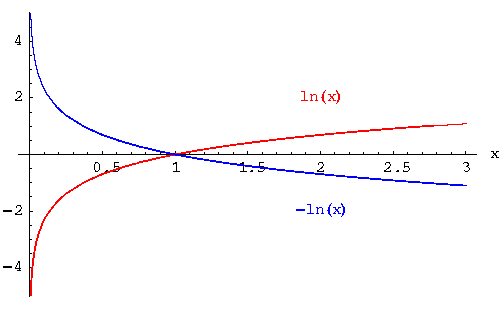

**Log Loss** e **Cross-Entropy** são ligeiramente diferentes dependendo do contexto, mas em aprendizado de máquina ao calcular as taxas de erro entre 0 e 1 elas são equivalentes (mesmos resultados).

### Regra MinMax

Ao calcular o Log Loss, os valores de probabilidade previstos 0 e 1 são indefinidos. Para evitar esse problema, Log Loss ajusta as probabilidades previstas (p) usando um valor pequeno (eps / epsilon) de acordo com a fórmula a seguir:

$$ max( min(p, 1−10^{−15}), 10^{-15}) $$

### Log Loss

Para 2 classes (classificação binária):

$$ - ( y \cdot \log{(p)} + (1 - y) \cdot \log{(1 - p)} ) $$

Para mais de 2 classes:

$$ - \sum_{c=1}^{M}{ y_{o,c} \log{(p_{o,c})} } $$

In [10]:
metrics.log_loss([0, 1], [0.25, 0.75])

0.2876820724517809

In [11]:
metrics.log_loss([1, 0], [0.75, 0.25])

0.2876820724517809

In [12]:
metrics.log_loss([0, 1], [0.75, 0.25])

1.3862943611198906

In [13]:
def logloss(y_true, y_prob, eps=1e-15):
    p = np.clip(y_prob, eps, 1 - eps)
    return -np.log(1 - p)

In [14]:
logloss(0, 0.25)

0.2876820724517809

In [15]:
logloss(0, 0.75)

1.3862943611198906

### Calculando para o conjunto de dados iris

In [16]:
metrics.log_loss(y_test, y_probs)

0.1819481068777562

## Métrica Curva ROC - Receiver Operating Characteristic

É uma forma de visualizar o desempenho de um classificador binário.

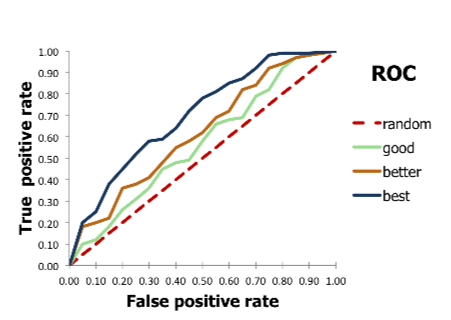

###  AUC - Area Under the Curve

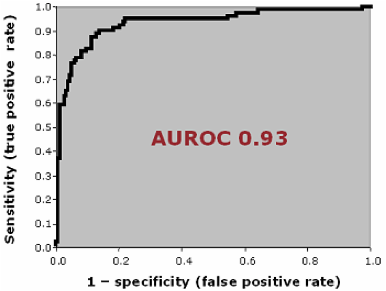

In [17]:
np.unique(y_test)

array([0, 1, 2])

In [18]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_probs[:, 0], pos_label=0)
print('x', fpr.round(4))
print('y', tpr.round(4))
print('AUC', metrics.auc(fpr, tpr))

x [0. 0. 0. 1.]
y [0.     0.0667 1.     1.    ]
AUC 1.0


Text(0.5, 1.0, 'Curva ROC')

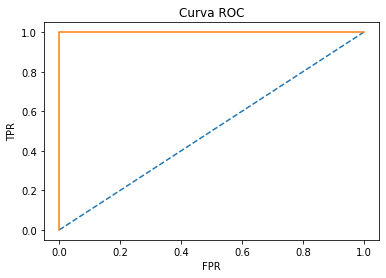

In [19]:
plt.plot([0, 1], [0, 1], '--')
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC')

In [20]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_probs[:, 1], pos_label=1)
print('x', fpr.round(4))
print('y', tpr.round(4))
print('AUC', metrics.auc(fpr, tpr))

x [0.  0.  0.  0.1 0.1 1. ]
y [0.     0.0667 0.9333 0.9333 1.     1.    ]
AUC 0.9933333333333334


In [21]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_probs[:, 2], pos_label=2)
print('x', fpr.round(4))
print('y', tpr.round(4))
print('AUC', metrics.auc(fpr, tpr))

x [0.     0.     0.     0.0333 0.0333 1.    ]
y [0.     0.0667 0.8    0.8    1.     1.    ]
AUC 0.9933333333333333


Text(0.5, 1.0, 'Curva ROC')

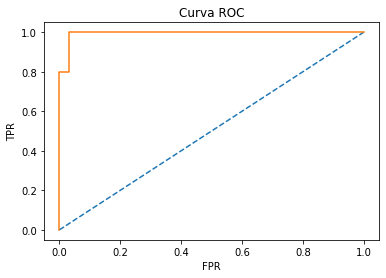

In [22]:
plt.plot([0, 1], [0, 1], '--')
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC')

### Outra forma de calcular AUC

In [23]:
y_test_binary_2 = np.where(y_test == 2, 1, 0)

In [24]:
metrics.roc_auc_score(y_test_binary_2, y_probs[:, 2])

0.9933333333333333